In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_set= pd.read_csv('Social_Network_Ads.csv')  

In [3]:
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  

In [4]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [11]:
from sklearn.preprocessing import StandardScaler    
sc= StandardScaler()    
x_train= sc.fit_transform(x_train)    
x_test= sc.transform(x_test)  

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [14]:
y_pred = classifier.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix is: \n",cm)
a=accuracy_score(y_test,y_pred)
print("Accuracy : ",a," or ",a*100,"%")

Confusion matrix is: 
 [[64  4]
 [ 3 29]]
Accuracy :  0.93  or  93.0 %


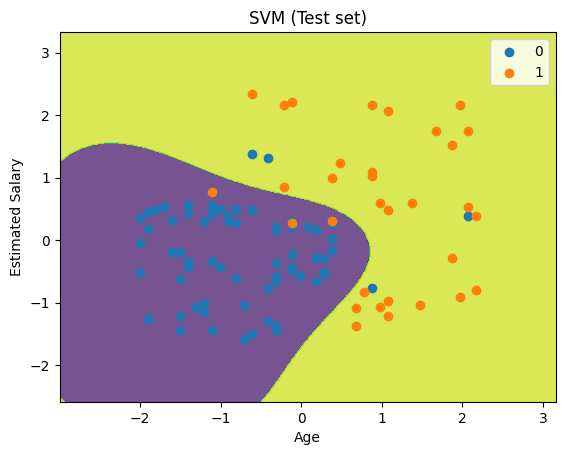

In [26]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
    
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()